## 6. Write a program to implement simple linear regression

### From Scratch

Slope: 9449.962321455076
Intercept: 25792.200198668696
R^2: 0.9569566641435086


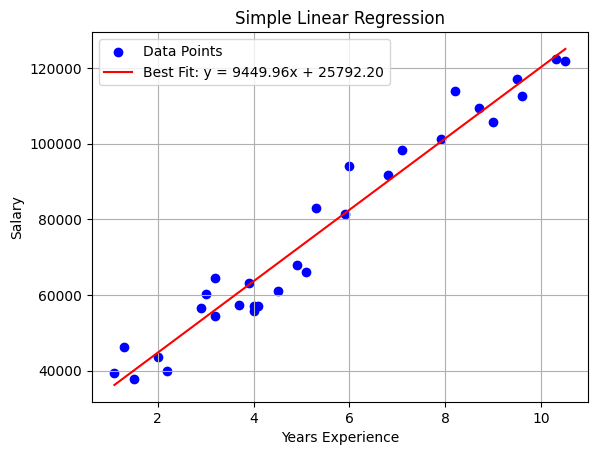

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/Dataset/logistic_Salary_Data.csv")
x = data["YearsExperience"]
y = data["Salary"]
n = len(x)

xMean = sum(x) / n
yMean = sum(y) / n

dx = x - xMean
dy = y - yMean

d = dx * dy
dx2 = dx * dx
dy2 = dy * dy

slope = sum(d) / sum(dx2)
intercept = yMean - slope * xMean

yp = slope * x + intercept

r2 = 1 - (sum((y - yp) ** 2) / sum(dy2))

plt.scatter(x, y, c='b')
plt.plot(x, yp, c='r')

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
print(f'R^2: {r2}')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend(['Data Points', f'Best Fit: y = {slope:.2f}x + {intercept:.2f}'])
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()

### Using Library

Slope: 9449.962321455076
Intercept: 25792.200198668696


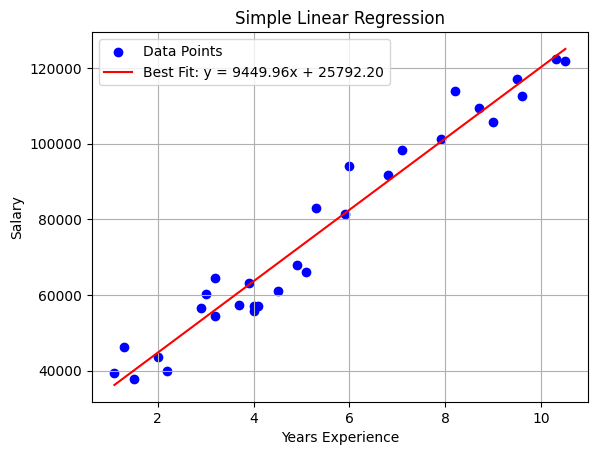

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = pd.read_csv("data/Dataset/logistic_Salary_Data.csv")
x = data[["YearsExperience"]]
y = data["Salary"]

model = LinearRegression()
model.fit(x, y)

yp = model.predict(x)

slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(x, y, c='b')
plt.plot(x, yp, c='r')
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend(['Data Points', f'Best Fit: y = {slope:.2f}x + {intercept:.2f}'])
plt.title('Simple Linear Regression')
plt.grid(True)
plt.show()